# Автокорреляция

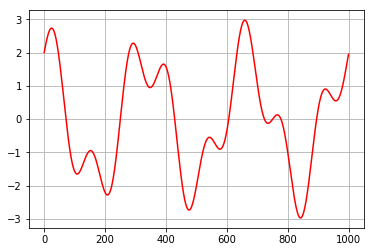

In [2]:
from numpy import array, arange, mean, var, abs as np_abs
from numpy.fft import rfft, rfftfreq
from math import sin, pi, cos, sqrt
import matplotlib.pyplot as plt
import matplotlib as mpl
import random

N = 1000
w = (2 * pi / N)
signal = array([sin(8 * w * t) + 2 * cos(3 * w * t) for t in range(N)])
#signal = array([1 * sin(4 * 0.1 * t) + 2 * cos(2 * 0.064 * t) for t in range(N)])
#signal = array([sin(0.1 * t) + 2 * cos(0.05 * t) for t in range(N)])
plt.plot(arange(N), signal, 'r')
plt.grid(True)
plt.show()

In [3]:
import math
import cmath

def DFT(fnList):
    N = len(fnList)
    FmList = []
    for m in range(N):
        Fm = 0.0
        for n in range(N):
            Fm += fnList[n] * cmath.exp(1j * 2.0 * math.pi  * m * n / N)
        #FmList.append(Fm)
        FmList.append(Fm / N)
    return FmList

def InverseDFT(FmList):
    N = len(FmList)
    fnList = []
    for n in range(N):
        fn = 0.0
        for m in range(N):
            fn += FmList[m] * cmath.exp(-1j * 2.0 * math.pi  * m * n / N)
        #fnList.append(fn / N)
        fnList.append(fn)
    return fnList

In [4]:
def autocor_calc(corList , s):
    N = len(corList)
    CorList = []
    meany = mean(corList)
    
    for m in range(s):
        Cor = 0.0
        for n in range(N - m):
            Cor += (corList[n] - meany) * (corList[n + m] - meany)
        CorList.append(Cor / (N - m))
    return CorList

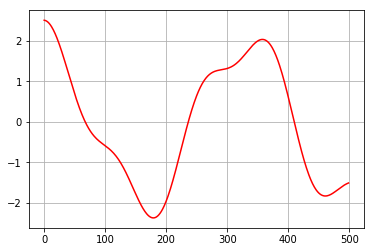

In [26]:
autocor = autocor_calc(signal , 500)

plt.plot(arange(len(autocor)), autocor, 'r')
plt.grid(True)
plt.show()

In [27]:
print(autocor_calc(signal , 1))
print(var(signal))

[2.500000000000004]
2.5


In [8]:
G = [random.gauss(0,1) for i in range(100)]

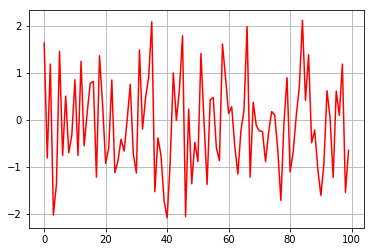

In [10]:
plt.plot(arange(len(G)), G, 'r')
plt.grid(True)
plt.show()

In [11]:
I = DFT(G)

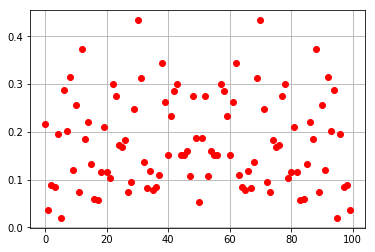

In [12]:
M = []
for i in range(len(I)):
    M.append(sqrt(I[i].real**2 + I[i].imag**2) * 2)

plt.plot(arange(len(M)), M, 'ro')
plt.grid(True)
plt.show()

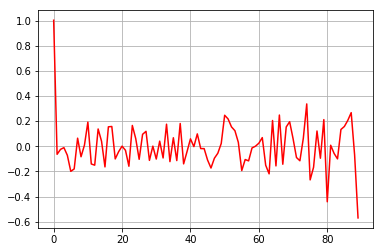

In [30]:
autocor = autocor_calc(G , 90)

plt.plot(arange(len(autocor)), autocor, 'r')
plt.grid(True)
plt.show()

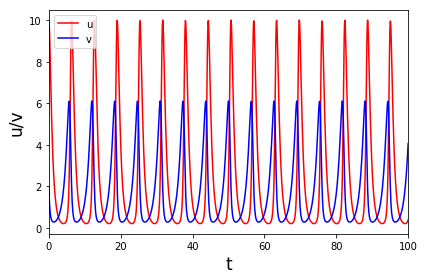

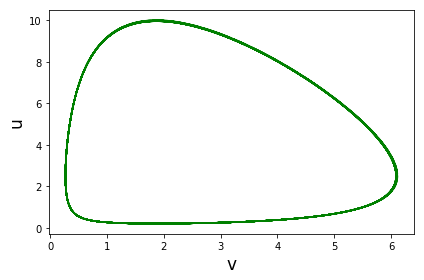

In [17]:

import matplotlib.pyplot as plt
import numpy as np

def feval(funcName, *args):
    return eval(funcName)(*args)

def RK4(func, yinit, x_range, h):
    m = len(yinit)
    n = int((x_range[-1] - x_range[0])/h)

    x = x_range[0]
    y = yinit

    # Containers for solutions
    xsol = np.empty(0)
    xsol = np.append(xsol, x)

    ysol = np.empty(0)
    ysol = np.append(ysol, y)

    for i in range(n):
        k1 = feval(func, x, y)
        yp2 = y + k1*(h/2)
        k2 = feval(func, x+h/2, yp2)
        yp3 = y + k2*(h/2)
        k3 = feval(func, x+h/2, yp3)
        yp4 = y + k3*h
        k4 = feval(func, x+h, yp4)

        for j in range(m):
            y[j] = y[j] + (h/6)*(k1[j] + 2*k2[j] + 2*k3[j] + k4[j])

        x += h
        xsol = np.append(xsol, x)

        for r in range(len(y)):
            ysol = np.append(ysol, y[r])

    return [xsol, ysol]

def ODES(x, y):
    al1 = 1.5
    al2 = 1
    g1 = 0.8
    g2 = 0.4
    dy = np.zeros((len(y)))
    dy[0] = -y[0] * al1 + g1 * y[0] * y[1]
    dy[1] = y[1] * al2 - g2 * y[0] * y[1]
    return dy

h = 0.1
x = np.array([0.0, 100.0])
yinit = np.array([10.0, 2.0])

[ts, ys] = RK4('ODES', yinit, x, h)

node = len(yinit)
ys1 = ys[0::node]
ys2 = ys[1::node]

plt.plot(ts, ys1, 'r')
plt.plot(ts, ys2, 'b')
plt.xlim(x[0], x[1])
plt.legend(["u", "v"], loc=2)
plt.xlabel('t', fontsize=17)
plt.ylabel('u/v', fontsize=17)
plt.tight_layout()
plt.show()

plt.plot(ys2, ys1, 'g')
plt.xlabel('v', fontsize=17)
plt.ylabel('u', fontsize=17)
plt.tight_layout()
plt.show()


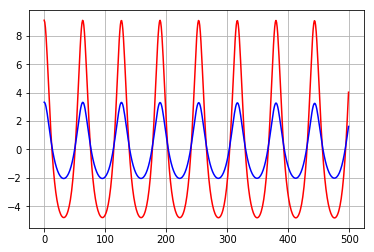

In [24]:
autocor = autocor_calc(ys1 , 500)
autocor2 = autocor_calc(ys2 , 500)

plt.plot(arange(len(autocor)), autocor, 'r')
plt.plot(arange(len(autocor2)), autocor2, 'b')
plt.grid(True)
plt.show()